In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlr-toyota-corolla-dataset/ToyotaCorolla - MLR.csv


In [2]:
## Importing Required Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
sns.set_theme(style='darkgrid',palette='rainbow')

In [3]:
## Importing Dataset
df = pd.read_csv('/kaggle/input/mlr-toyota-corolla-dataset/ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
## Data Understanding

In [5]:
df.shape

(1436, 11)

In [6]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [8]:
df.nunique()

Price         236
Age_08_04      77
KM           1263
Fuel_Type       3
HP             12
Automatic       2
cc             13
Doors           4
Cylinders       1
Gears           4
Weight         59
dtype: int64

In [9]:
df['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [10]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [11]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


From the descriptive analysis, we can infer that, KM column have presence of outliers, there is huge difference between mean and maximum value

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

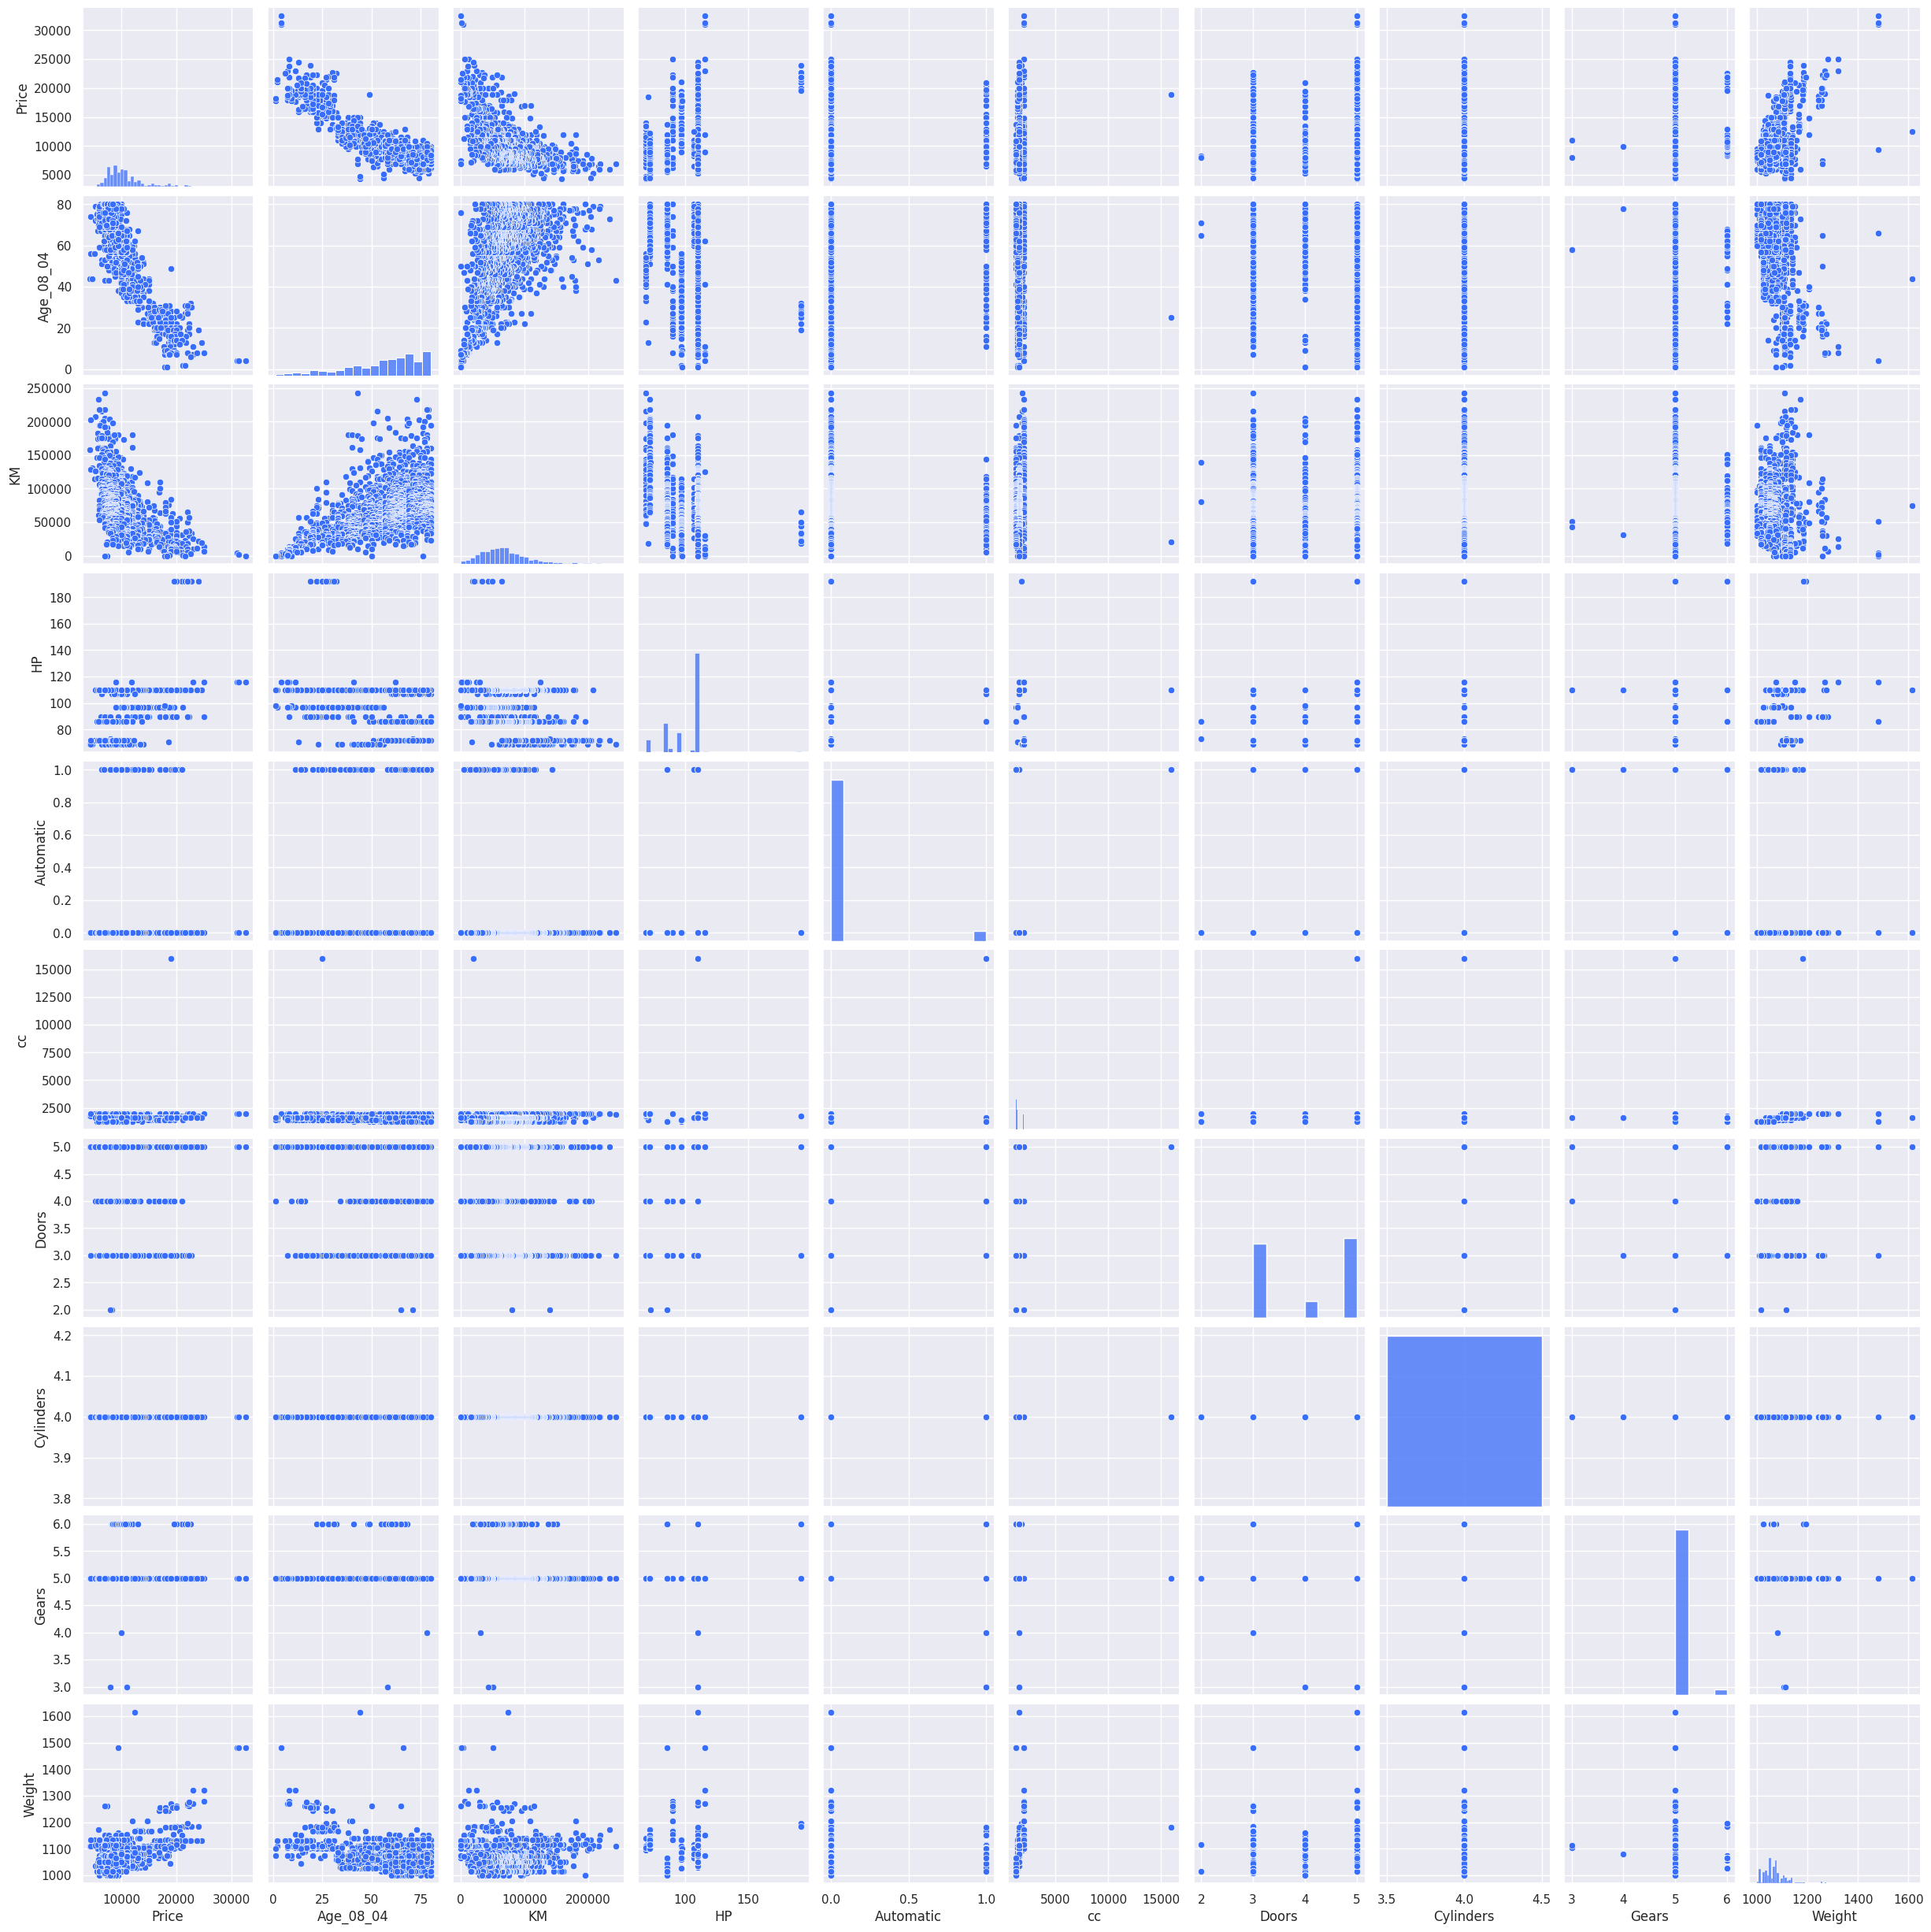

In [12]:
sns.pairplot(df)

##### Assumption check
###### Checking input and output columns dependencies

In [13]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [14]:
df.rename(columns={'Age_08_04':'Age'}, inplace=True)

In [15]:
df.columns

Index(['Price', 'Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

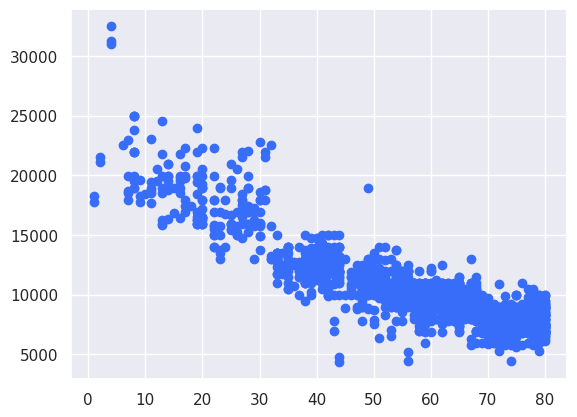

In [16]:
plt.scatter(x= 'Age', y='Price', data=df)

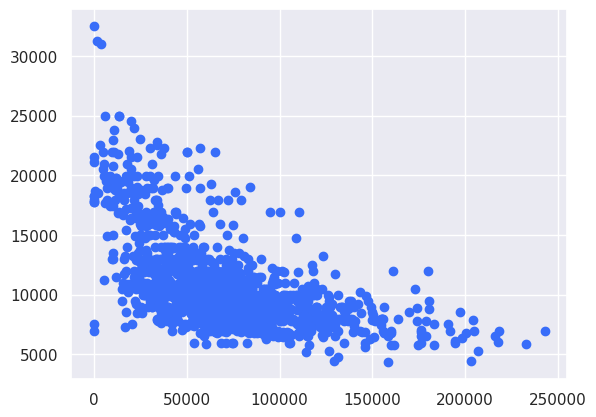

In [17]:
plt.scatter(x= 'KM', y='Price', data=df)

In [18]:
df.isna().sum()

Price        0
Age          0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

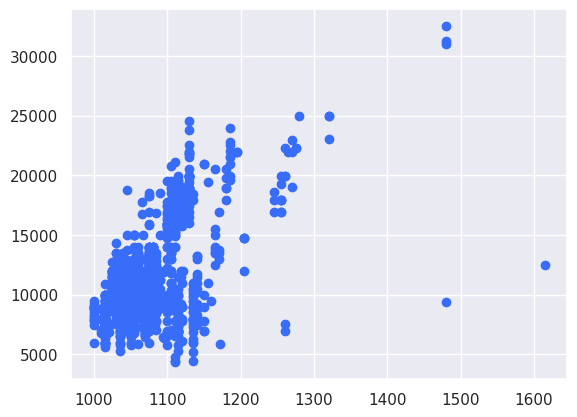

In [19]:
plt.scatter(x= 'Weight', y='Price', data=df)

In [20]:
df.drop(columns=['Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears'], inplace=True)

In [21]:
df.head()

,Price,Age,KM,Weight
0,13500,23,46986,1165
1,13750,23,72937,1165
2,13950,24,41711,1165
3,14950,26,48000,1165
4,13750,30,38500,1170


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

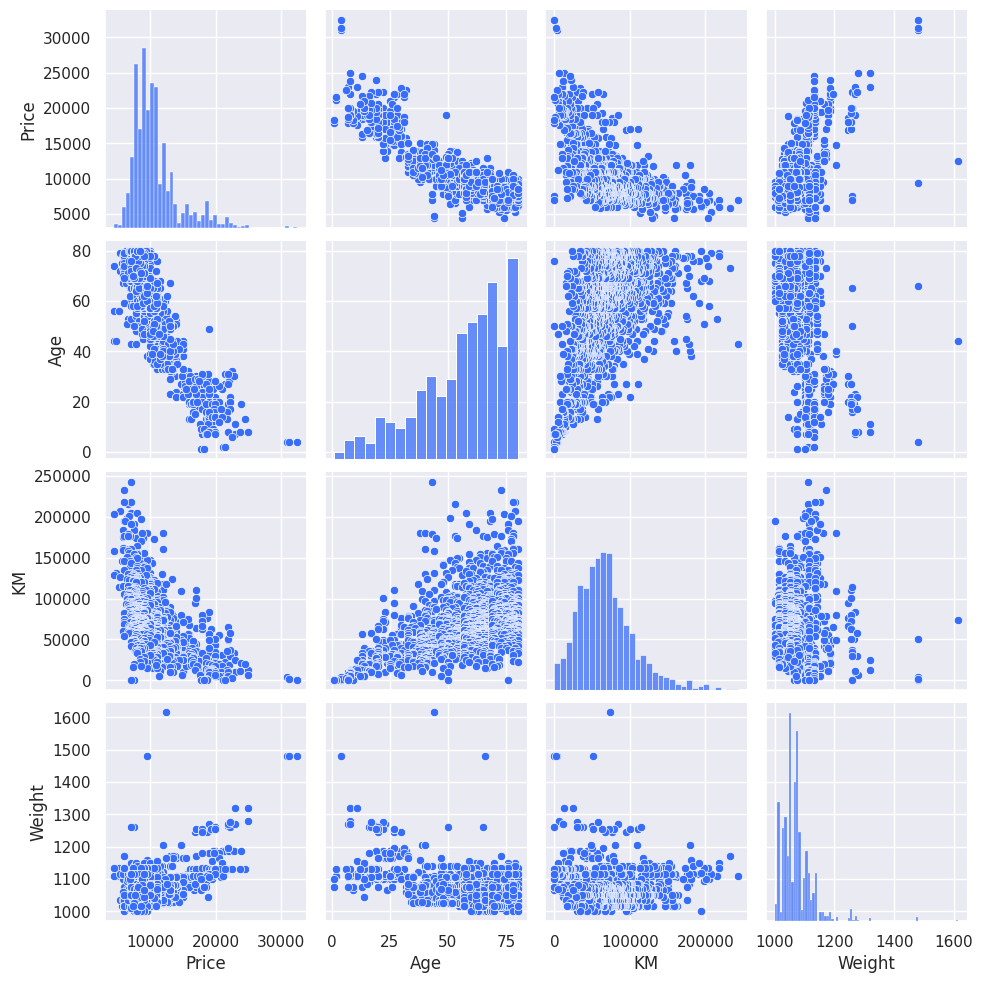

In [22]:
sns.pairplot(df)

In [23]:
#### Checking Outliers in the dataset

<Axes: >

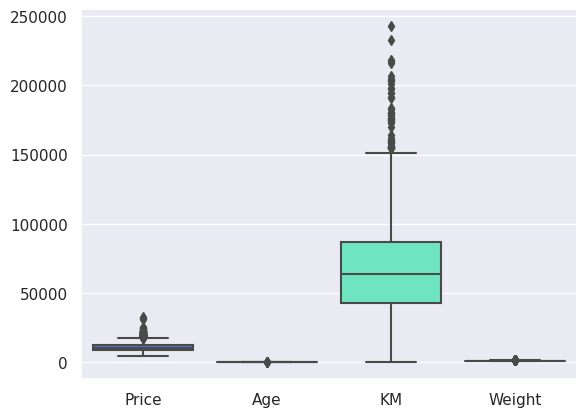

In [24]:
sns.boxplot(df)

In [25]:
##### Dealing with Outliers

In [26]:
def outliers_detection(df, columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower=Q1-1.5*IQR
        upper=Q3+1.5*IQR
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df

In [27]:
outliers_detection(df,['KM','Price','Age','Weight'])

,Price,Age,KM,Weight
0,13500.0,23.0,46986.0,1152.5
1,13750.0,23.0,72937.0,1152.5
2,13950.0,24.0,41711.0,1152.5
3,14950.0,26.0,48000.0,1152.5
4,13750.0,30.0,38500.0,1152.5
...,...,...,...,...
1431,7500.0,69.0,20544.0,1025.0
1432,10845.0,72.0,19000.0,1015.0
1433,8500.0,71.0,17016.0,1015.0
1434,7250.0,70.0,16916.0,1015.0


<Axes: >

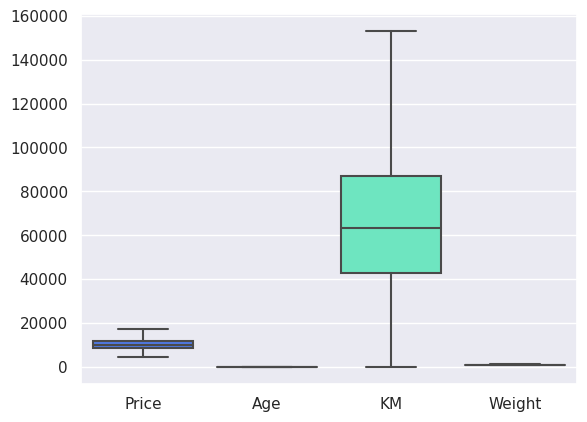

In [28]:
sns.boxplot(df)

Conclusion : After treating outliers from the KM column we can see that the range of the column is very high, we will check the accuracy before scaling and after standardaizing the data.

In [29]:
df.corr()

,Price,Age,KM,Weight
Price,1.000000,-0.895728,-0.608832,0.509536
Age,-0.895728,1.000000,0.531839,-0.478225
KM,-0.608832,0.531839,1.000000,-0.001489
Weight,0.509536,-0.478225,-0.001489,1.000000


In [30]:
df.info

<bound method DataFrame.info of         Price   Age       KM  Weight
0     13500.0  23.0  46986.0  1152.5
1     13750.0  23.0  72937.0  1152.5
2     13950.0  24.0  41711.0  1152.5
3     14950.0  26.0  48000.0  1152.5
4     13750.0  30.0  38500.0  1152.5
...       ...   ...      ...     ...
1431   7500.0  69.0  20544.0  1025.0
1432  10845.0  72.0  19000.0  1015.0
1433   8500.0  71.0  17016.0  1015.0
1434   7250.0  70.0  16916.0  1015.0
1435   6950.0  76.0      1.0  1114.0

[1436 rows x 4 columns]>

<Axes: >

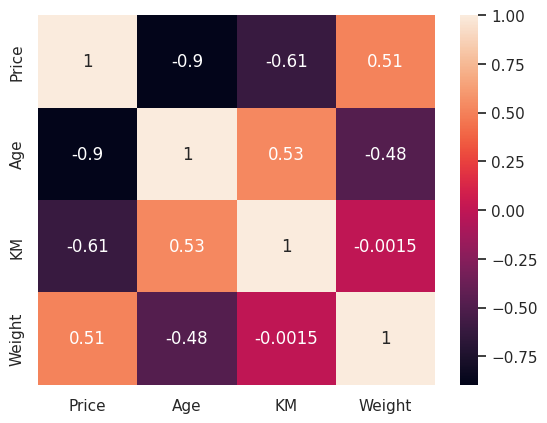

In [31]:
sns.heatmap(df.corr(),annot=True)

Conclusion : From the heatmap and correlations matrixs we can conclude that Age and KM columns are inversely proportional to price 

#### Spliting the dataset into the Training set and Test set 

In [32]:
X = df.drop('Price', axis=1)
y = df[['Price']]

In [33]:
X.shape, y.shape

((1436, 3), (1436, 1))

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=40)

#### Fitting Multi Linear Regression to the Training Set

In [35]:
X_train

,Age,KM,Weight
880,57.0,61682.0,1050.0
790,66.0,74963.0,1085.0
807,67.0,72880.0,1015.0
729,68.0,86714.0,1035.0
64,27.0,32809.0,1110.0
...,...,...,...
1016,65.0,35283.0,1015.0
165,14.0,6000.0,1130.0
7,30.0,75889.0,1152.5
219,38.0,74319.0,1075.0


In [36]:
## Standardizing the dataset

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [38]:
X_train=scaler.fit_transform(X_train)

In [39]:
X_test=scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [41]:
#### Predicting the Test Set results
y_pred = regressor.predict(X_test)
y_pred

array([[ 9740.60922743],
       [ 8350.93643543],
       [ 7993.54843189],
       [ 7811.69058934],
       [10484.78761791],
       [15129.75052761],
       [18124.14312585],
       [11923.32607643],
       [ 9103.06812628],
       [ 9246.41033479],
       [14696.21597912],
       [11284.893877  ],
       [ 8963.26104617],
       [ 8921.58281148],
       [ 7544.28929757],
       [11133.2107242 ],
       [10221.45214545],
       [11441.85522661],
       [13584.32581648],
       [ 7846.57890891],
       [ 7745.11751269],
       [10838.85824835],
       [10136.49230682],
       [10577.68463651],
       [12382.75701935],
       [ 7367.74111172],
       [10743.77412419],
       [12254.19955072],
       [ 9064.38469781],
       [16663.98304739],
       [ 6834.44421333],
       [10601.05742398],
       [ 8663.69331302],
       [ 8809.72842209],
       [ 8975.12902418],
       [15147.57916746],
       [12622.57918095],
       [ 9585.02078771],
       [ 6610.04361329],
       [11703.55578406],


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight


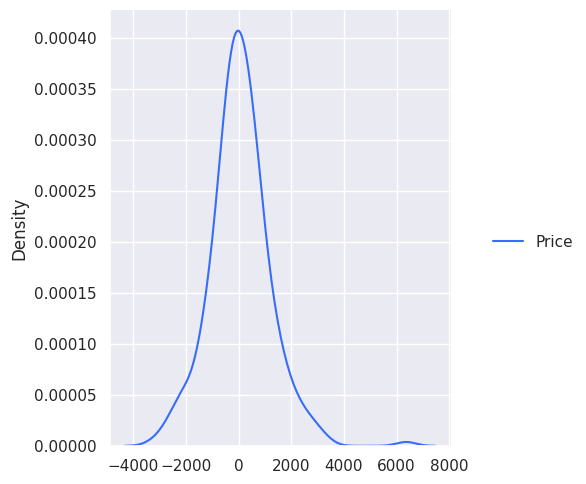

In [42]:
sns.displot(y_pred-y_test,kind='kde')

In [43]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.8465048207266943

In [44]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [45]:
np.mean(mse)

-1345222.5164353445

### Conclusion
We can see the r2score is good for linear regression but the mean squared error is more, we will try to fit these models with ridge and lasso regressio to overcome the overfitting

#### Checking pvalues and params using OLS method building different models

In [46]:
model = smf.ols('Price~Age+KM+Weight', data=df).fit()

In [47]:
model.pvalues

Intercept     4.587499e-02
Age          3.817463e-285
KM            1.004786e-75
Weight        2.703752e-48
dtype: float64

In [48]:
model.params

Intercept    2189.315316
Age          -108.037512
KM             -0.021526
Weight         14.797448
dtype: float64

In [49]:
model.rsquared

0.8507617229036716

In [50]:
model.fittedvalues

0       15747.086450
1       15188.463112
2       15752.599018
3       15401.146468
4       15173.494193
            ...     
1431     9459.878973
1432     9021.028231
1433     9171.773488
1434     9281.963608
1435    10462.799516
Length: 1436, dtype: float64

In [51]:
model.resid

0      -2247.086450
1      -1438.463112
2      -1802.599018
3       -451.146468
4      -1423.494193
           ...     
1431   -1959.878973
1432    1823.971769
1433    -671.773488
1434   -2031.963608
1435   -3512.799516
Length: 1436, dtype: float64

Text(0, 0.5, 'Resudual')

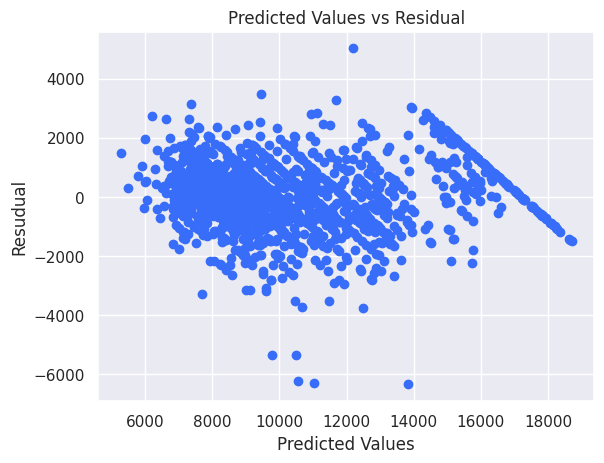

In [52]:
plt.scatter(model.fittedvalues,model.resid)
plt.title('Predicted Values vs Residual')
plt.xlabel('Predicted Values')
plt.ylabel('Resudual')

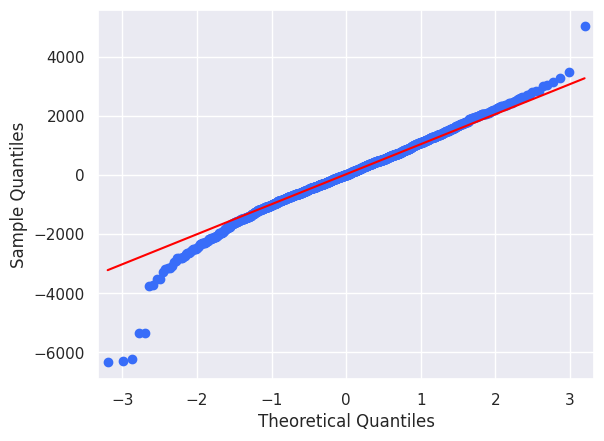

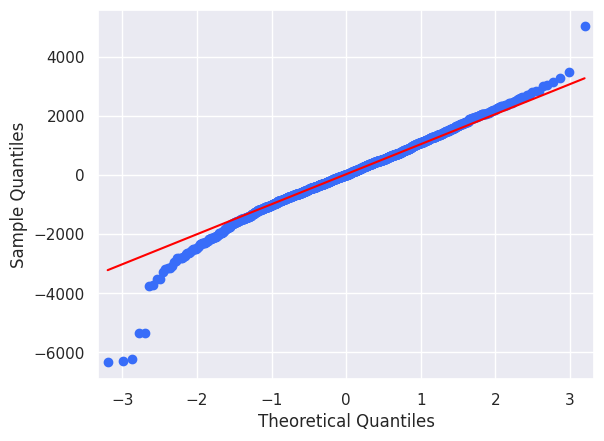

In [53]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')

In [54]:
model = smf.ols('Price~Age+KM', data=df).fit()

In [55]:
model.pvalues

Intercept    0.000000e+00
Age          0.000000e+00
KM           4.661028e-43
dtype: float64

In [56]:
model.params

Intercept    18739.605149
Age           -128.080412
KM              -0.015853
dtype: float64

In [57]:
model.rsquared

0.8267902778667262

In [58]:
model.fittedvalues

0       15048.892607
1       14637.494709
2       15004.436098
3       14648.576559
4       14286.857203
            ...     
1431     9576.375330
1432     9216.610930
1433     9376.143441
1434     9505.809140
1435     9005.478011
Length: 1436, dtype: float64

In [59]:
model.resid

0      -1548.892607
1       -887.494709
2      -1054.436098
3        301.423441
4       -536.857203
           ...     
1431   -2076.375330
1432    1628.389070
1433    -876.143441
1434   -2255.809140
1435   -2055.478011
Length: 1436, dtype: float64

Text(0, 0.5, 'Resudual')

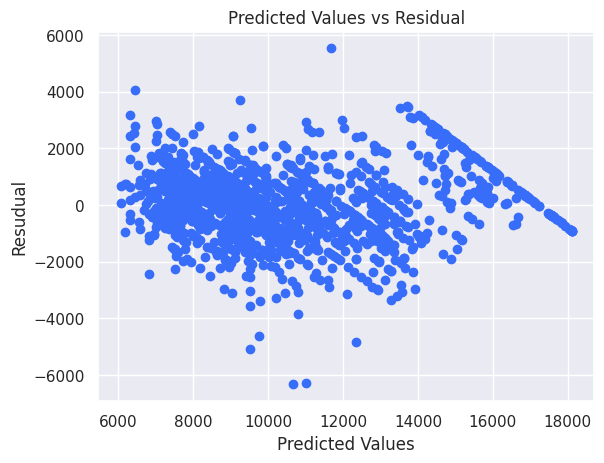

In [60]:
plt.scatter(model.fittedvalues,model.resid)
plt.title('Predicted Values vs Residual')
plt.xlabel('Predicted Values')
plt.ylabel('Resudual')

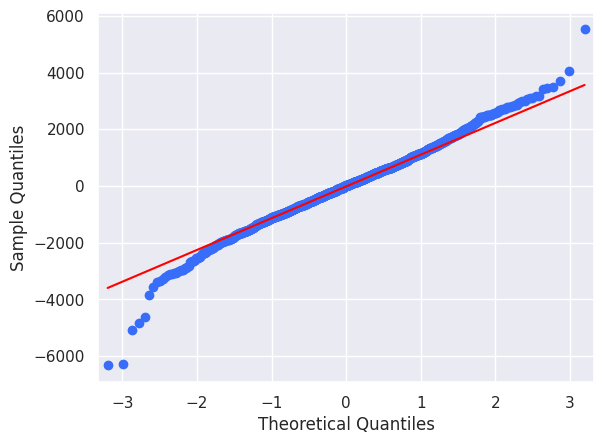

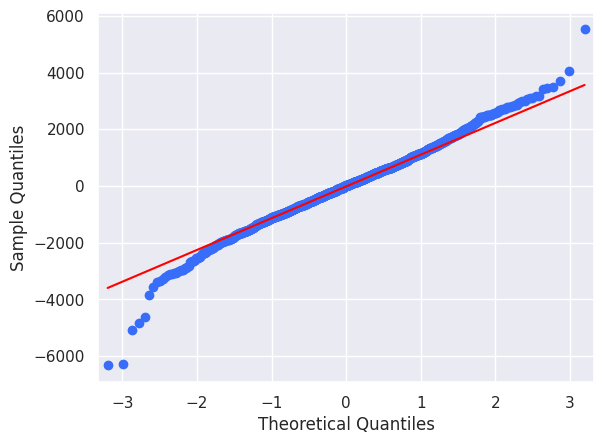

In [61]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')

In [62]:
model = smf.ols('Price~Age+Weight', data=df).fit()

In [63]:
model.pvalues

Intercept    4.847245e-15
Age          0.000000e+00
Weight       1.781538e-15
dtype: float64

In [64]:
model.params

Intercept    9220.656784
Age          -135.772072
Weight          8.307884
dtype: float64

In [65]:
model.rsquared

0.810872176774678

In [66]:
model.fittedvalues

0       15672.735743
1       15672.735743
2       15536.963671
3       15265.419527
4       14722.331239
            ...     
1431     8367.965189
1432     7877.570130
1433     8013.342202
1434     8149.114274
1435     8156.962384
Length: 1436, dtype: float64

In [67]:
model.resid

0      -2172.735743
1      -1922.735743
2      -1586.963671
3       -315.419527
4       -972.331239
           ...     
1431    -867.965189
1432    2967.429870
1433     486.657798
1434    -899.114274
1435   -1206.962384
Length: 1436, dtype: float64

Text(0, 0.5, 'Resudual')

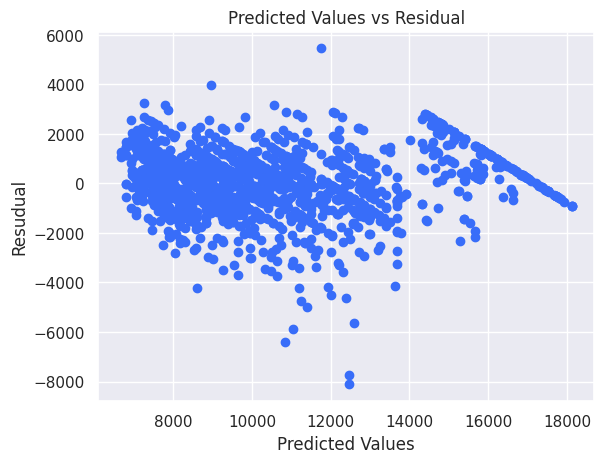

In [68]:
plt.scatter(model.fittedvalues,model.resid)
plt.title('Predicted Values vs Residual')
plt.xlabel('Predicted Values')
plt.ylabel('Resudual')

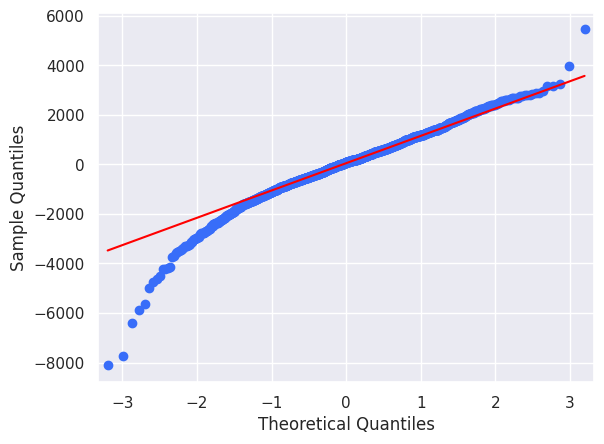

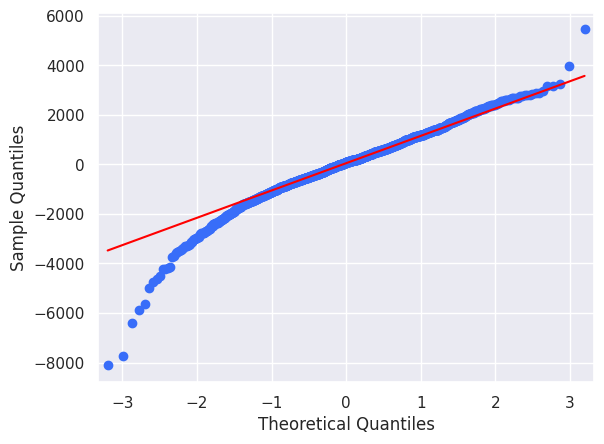

In [69]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')

In [70]:
model = smf.ols('Price~KM+Weight', data=df).fit()  

In [71]:
model.pvalues

Intercept     4.055512e-87
KM           1.410970e-217
Weight       5.748326e-167
dtype: float64

In [72]:
model.params

Intercept   -28873.992652
KM              -0.052195
Weight          40.149784
dtype: float64

In [73]:
model.rsquared

0.6293812009387553

In [74]:
model.fittedvalues

0       14946.220121
1       13591.719527
2       15221.546337
3       14893.294854
4       15389.143016
            ...     
1431    11207.250828
1432    10886.341367
1433    10989.895341
1434    10995.114796
1435    15852.814072
Length: 1436, dtype: float64

In [75]:
model.resid

0      -1446.220121
1        158.280473
2      -1271.546337
3         56.705146
4      -1639.143016
           ...     
1431   -3707.250828
1432     -41.341367
1433   -2489.895341
1434   -3745.114796
1435   -8902.814072
Length: 1436, dtype: float64

Text(0, 0.5, 'Resudual')

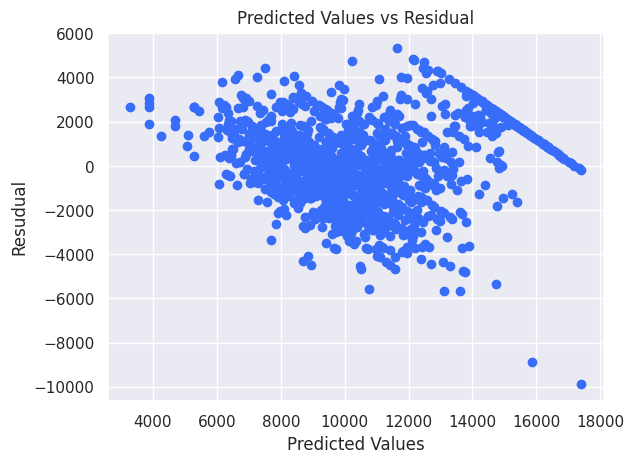

In [76]:
plt.scatter(model.fittedvalues,model.resid)
plt.title('Predicted Values vs Residual')
plt.xlabel('Predicted Values')
plt.ylabel('Resudual')

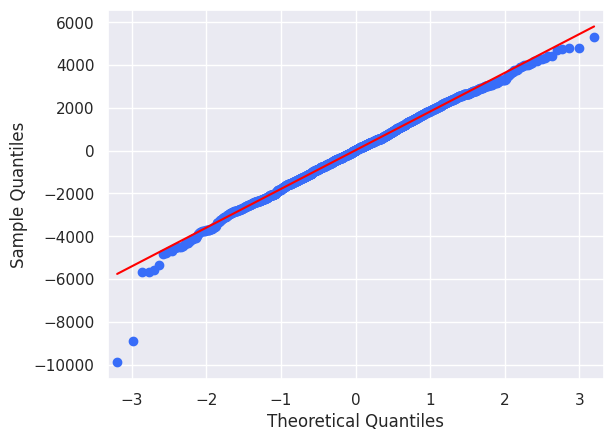

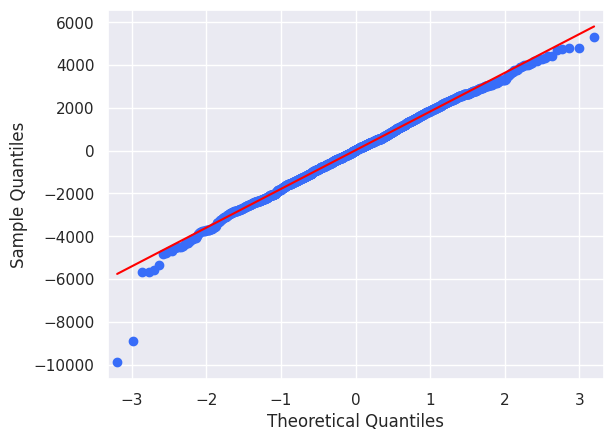

In [77]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')

### Conclusion : 
Since all of the above 3 models, using the Ordinary Least Square Method (OLS) we can conclude that the pvalues for the columns are less than the confidence interval i.e. alpha value also from the params KM and Age are inversaly proportional to the price columns and weight is directly proportional to price, all the 3 input columns giving good accuray for building the model, so we can select first model 

### Ridge Regression (Solving overfitting problems)

In [78]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [79]:
ridge_regressor=Ridge()

In [80]:
ridge_regressor

Ridge()

In [81]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [82]:
print(ridgecv.best_params_)

{'alpha': 1}


In [83]:
print(ridgecv.best_score_)

-1345222.7224414805


In [84]:
ridge_pred=ridgecv.predict(X_test)
print(ridge_pred)

[[ 9741.46246475]
 [ 8351.54130019]
 [ 7994.0317524 ]
 [ 7814.99173827]
 [10484.01003636]
 [15128.00003327]
 [18120.40082711]
 [11923.0740075 ]
 [ 9101.94041614]
 [ 9248.15951294]
 [14693.72418627]
 [11286.60976799]
 [ 8964.76727723]
 [ 8922.25152322]
 [ 7545.68875904]
 [11132.92007484]
 [10220.90768172]
 [11440.66864007]
 [13582.44928488]
 [ 7847.61913684]
 [ 7748.03459969]
 [10837.12117656]
 [10136.85281689]
 [10578.79452298]
 [12380.2353725 ]
 [ 7369.86334233]
 [10744.32139271]
 [12252.30864343]
 [ 9063.5844288 ]
 [16659.70669355]
 [ 6835.57858273]
 [10601.31149339]
 [ 8662.21492103]
 [ 8808.60379088]
 [ 8977.0458772 ]
 [15143.97373888]
 [12620.79420753]
 [ 9582.78317883]
 [ 6611.19672146]
 [11701.21506391]
 [12882.43113039]
 [12487.08967894]
 [12088.94444471]
 [ 9145.68915595]
 [ 9596.34925354]
 [18643.22178382]
 [10180.20382084]
 [ 7556.18543872]
 [15342.53119977]
 [10175.36273011]
 [ 6750.39767758]
 [ 7132.55747002]
 [13126.73558491]
 [ 7947.32877918]
 [10513.12839335]
 [ 8369.83

In [85]:
ridge_pred.shape

(288, 1)

In [86]:
from sklearn.metrics import r2_score
ridge_score = r2_score(y_test, ridge_pred)
ridge_score

0.8465836318140376

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight


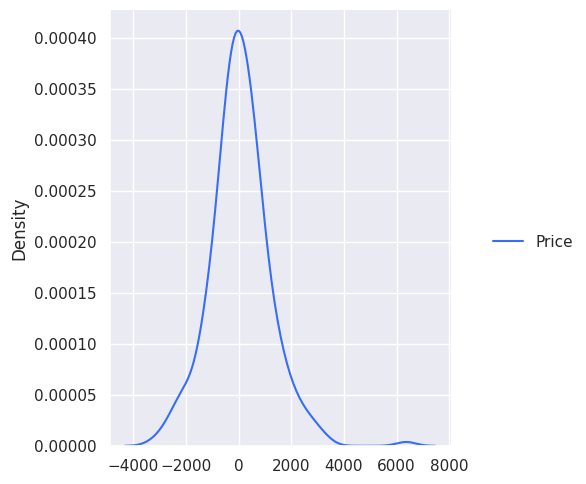

In [87]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

## Lasso Regression

In [88]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [89]:
lasso_regressor = Lasso()
lasso_regressor

Lasso()

In [90]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [91]:
print(lassocv.best_params_)

{'alpha': 2}


In [92]:
print(lassocv.best_score_)

-1345209.4695368705


In [93]:
lasso_pred=lassocv.predict(X_test)
#print(lasso_pred)

In [94]:
lasso_pred=lasso_pred.reshape(288,1)

In [95]:
from sklearn.metrics import r2_score
lasso_score = r2_score(y_test, lasso_pred)
lasso_score

0.8464702749576243

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight


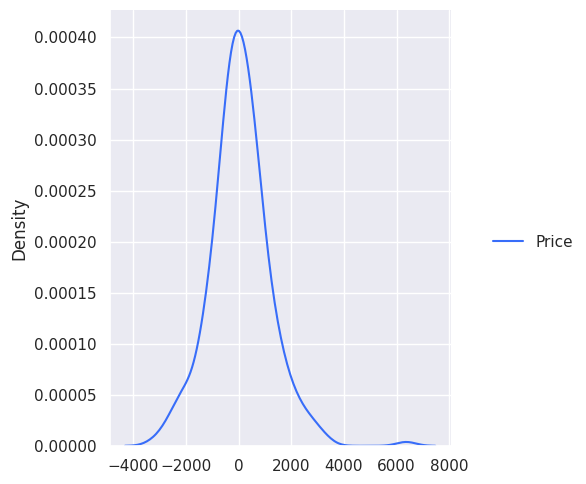

In [96]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')